## Exercises:
* ##### E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?
* ##### E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?
* ##### E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?
* ##### E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?
* ##### E05: look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?
* ##### E06: meta-exercise! Think of a fun/interesting exercise and complete it.

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
torch.cuda.device_count()

1

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.get_device_name(Out[3])

'AMD Radeon RX 6900 XT'

In [5]:
torch.set_default_device(Out[3])

### E01

In [6]:
# words = ['..'+line.split(',')[1].lower()+'.' for line in open("data/NationalNames.csv", 'r').read().splitlines()][1:]
words = [line.split(',')[1].lower() for line in open("data/NationalNames.csv", 'r').read().splitlines()][1:][:20000]
len(words)

20000

In [7]:
from GramModels import GramModel
trigram_counting_model = GramModel(method="counts",n_grams=3)
trigram_nn_model = GramModel(method="nn", n_grams=3)

In [8]:
trigram_counting_model.itos_in

In [9]:
trigram_counting_model.fit(words,smooth_factor=1)

Generating alphabet
alphabet Generated
Generating mappings
Mappings generated
Generatng n-grams
NGrams of length 134012 Generated


Counting grams..: 134012it [00:03, 42219.78it/s]
Calculating loss..: 100%|██████████| 134012/134012 [00:04<00:00, 32984.65it/s]


Finised with loss: 1.9684960842132568


In [10]:
trigram_nn_model.fit(words, epochs = 1000, lr =40, smooth_factor=0.1)

Generating alphabet
alphabet Generated
Generating mappings
Mappings generated
Generatng n-grams
NGrams of length 134012 Generated
Epoch 1: loss	3.8908798694610596
Epoch 2: loss	3.5975632667541504
Epoch 3: loss	3.439986228942871
Epoch 4: loss	3.345755100250244
Epoch 5: loss	3.2786600589752197
Epoch 6: loss	3.2262320518493652
Epoch 7: loss	3.1823275089263916
Epoch 8: loss	3.1436233520507812
Epoch 9: loss	3.1088221073150635
Epoch 10: loss	3.077378511428833
Epoch 11: loss	3.048962116241455
Epoch 12: loss	3.02327299118042
Epoch 13: loss	2.999986410140991
Epoch 14: loss	2.978766918182373
Epoch 15: loss	2.9592983722686768
Epoch 16: loss	2.941307306289673
Epoch 17: loss	2.924572467803955
Epoch 18: loss	2.908917188644409
Epoch 19: loss	2.894202947616577
Epoch 20: loss	2.880319595336914
Epoch 21: loss	2.8671786785125732
Epoch 22: loss	2.854708433151245
Epoch 23: loss	2.842848062515259
Epoch 24: loss	2.831547260284424
Epoch 25: loss	2.8207619190216064
Epoch 26: loss	2.8104546070098877
Epoch 27: l

In [11]:
trigram_counting_model.generateWords(20)

Generating Words..: 100%|██████████| 20/20 [00:00<00:00, 224.27it/s]


['..runcy.',
 '..man.',
 '..rcie.',
 '..addie.',
 '..clin.',
 '..all.',
 '..dqgd.',
 '..clettypetta.',
 '..ivy.',
 '..iounion.',
 '..argida.',
 '..yn.',
 '..path.',
 '..thkvbjjohy.',
 '..mie.',
 '..aron.',
 '..arl.',
 '..hard.',
 '..lormh.',
 '..lonifran.']

In [12]:
trigram_nn_model.generateWords(20)

Generating Words..: 100%|██████████| 20/20 [00:00<00:00, 157.10it/s]


['..dieemo.',
 '..d.',
 '..altllgdmmeezb.',
 '..imqcubmo.',
 '...',
 '..imqahroamzgl.',
 '..ceovrqmzpaeamypdbodroejbeattiyiiyuippzpefqllio.',
 '..al.',
 '..gcyagncrwltnkzt.',
 '..rrgnoztqhzwgnpnxqaatlectdwdsbrwdiitoioddhzumcvjhc.',
 '..on.',
 '..a.',
 '..nru.',
 '..aredrhvasagnot.',
 '..mngno.',
 '..arhana.',
 '..eezecyqnzxcytkpzwfgbacztjaeguel.',
 '..ihsbgamclyde.',
 '..e.',
 '..oexmnyscihxthhblelyyvstianen.']

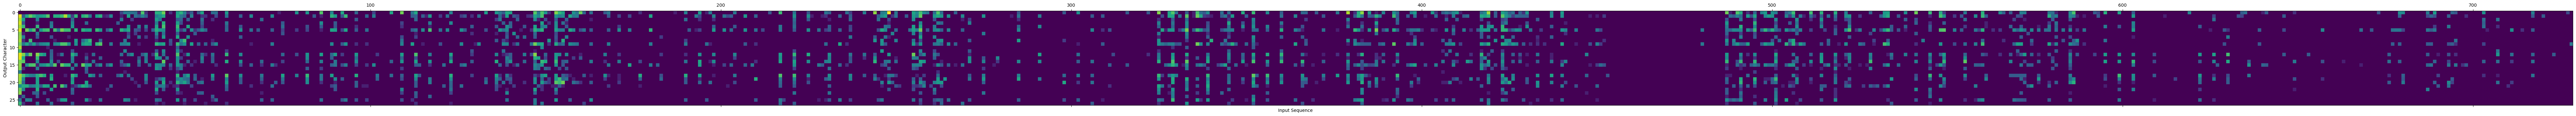

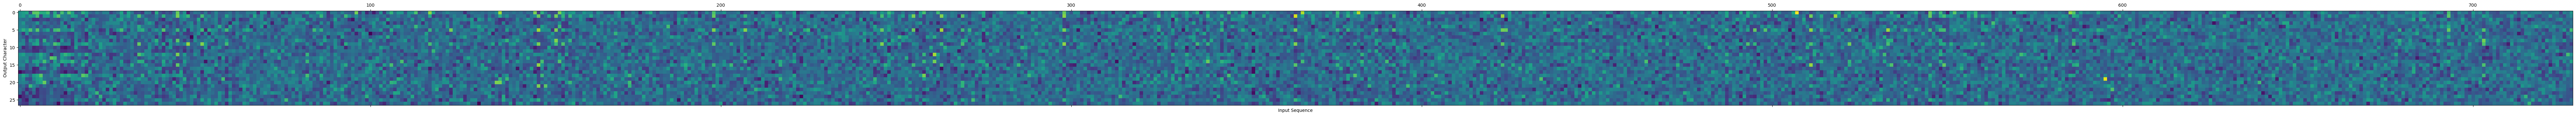

In [13]:
# plot matrix 
def plot_matrix(matrix):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=((27**2)/7, (27)/7))  # Increased figure size
    plt.matshow(matrix.T, aspect='equal', fignum=0)
    plt.xlabel('Input Sequence')
    plt.ylabel('Output Character')
    
    plt.show()

plot_matrix(trigram_counting_model.W.cpu().data)
plot_matrix(trigram_nn_model.W.cpu().data)

In [14]:
print((c_m := trigram_counting_model.W.cpu().data).max(), c_m.min(), c_m.mean())
print((nn_m := trigram_nn_model.W.cpu().data).max(), nn_m.min(), nn_m.mean())

tensor(7.8785) tensor(0.) tensor(0.3964)
tensor(6.4190) tensor(-3.5598) tensor(-0.0027)


In [15]:
del trigram_counting_model
del trigram_nn_model

In [16]:

import gc
gc.collect()

3239

## E02

In [17]:
# Shuffle words
import random
random.shuffle(words)
# Split words into 80 10 10
n = len(words)
train_words, val_words, test_words = words[:int(0.8*n)], words[int(0.8*n):int(0.9*n)], words[int(0.9*n):]

In [18]:
bigram_nn = GramModel(method="nn", n_grams=2)
trigram_nn = GramModel(method="nn", n_grams=3)

In [19]:
bigram_nn.fit(train_words, epochs = 1000, lr =40, smooth_factor=1)

Generating alphabet
alphabet Generated
Generating mappings
Mappings generated
Generatng n-grams
NGrams of length 107246 Generated
Epoch 1: loss	3.897752285003662
Epoch 2: loss	3.339432716369629
Epoch 3: loss	3.0815317630767822
Epoch 4: loss	2.9502429962158203
Epoch 5: loss	2.8700318336486816
Epoch 6: loss	2.8136539459228516
Epoch 7: loss	2.7724826335906982
Epoch 8: loss	2.7415223121643066
Epoch 9: loss	2.717604637145996
Epoch 10: loss	2.698533296585083
Epoch 11: loss	2.682887315750122
Epoch 12: loss	2.6697988510131836
Epoch 13: loss	2.6587183475494385
Epoch 14: loss	2.6492652893066406
Epoch 15: loss	2.6411516666412354
Epoch 16: loss	2.6341490745544434
Epoch 17: loss	2.62807035446167
Epoch 18: loss	2.6227612495422363
Epoch 19: loss	2.6180965900421143
Epoch 20: loss	2.6139729022979736
Epoch 21: loss	2.6103057861328125
Epoch 22: loss	2.6070263385772705
Epoch 23: loss	2.6040773391723633
Epoch 24: loss	2.601411819458008
Epoch 25: loss	2.5989913940429688
Epoch 26: loss	2.596782922744751
Epoc

In [20]:
trigram_nn.fit(train_words, epochs = 1000, lr =40, smooth_factor=1)

Generating alphabet
alphabet Generated
Generating mappings
Mappings generated
Generatng n-grams
NGrams of length 107246 Generated
Epoch 1: loss	3.7971034049987793
Epoch 2: loss	3.5660150051116943
Epoch 3: loss	3.4345920085906982
Epoch 4: loss	3.351815938949585
Epoch 5: loss	3.293020725250244
Epoch 6: loss	3.2435367107391357
Epoch 7: loss	3.19992995262146
Epoch 8: loss	3.1606950759887695
Epoch 9: loss	3.125021457672119
Epoch 10: loss	3.092410087585449
Epoch 11: loss	3.0625123977661133
Epoch 12: loss	3.0350520610809326
Epoch 13: loss	3.0097925662994385
Epoch 14: loss	2.9865148067474365
Epoch 15: loss	2.965013265609741
Epoch 16: loss	2.9450929164886475
Epoch 17: loss	2.9265737533569336
Epoch 18: loss	2.909292221069336
Epoch 19: loss	2.8931057453155518
Epoch 20: loss	2.877890110015869
Epoch 21: loss	2.8635408878326416
Epoch 22: loss	2.8499679565429688
Epoch 23: loss	2.837096929550171
Epoch 24: loss	2.8248636722564697
Epoch 25: loss	2.8132131099700928
Epoch 26: loss	2.8020994663238525
Epoch

In [21]:
bigram_loss_val = bigram_nn.calc_loss(val_words).item()
bigram_loss_test = bigram_nn.calc_loss(test_words).item()
trigram_loss_val = trigram_nn.calc_loss(val_words).item()
trigram_loss_test = trigram_nn.calc_loss(test_words).item()
print(f"{bigram_loss_val=:.4f}\t{bigram_loss_test=:.4f}")
print(f"{trigram_loss_val=:.4f}\t{trigram_loss_test=:.4f}")

Generatng n-grams
NGrams of length 13349 Generated
Generatng n-grams
NGrams of length 13417 Generated
Generatng n-grams
NGrams of length 13349 Generated
Generatng n-grams
NGrams of length 13417 Generated
bigram_loss_val=3.1666	bigram_loss_test=3.1614
trigram_loss_val=3.4575	trigram_loss_test=3.3621


In [22]:
del bigram_nn
del trigram_nn
gc.collect()

0